# Medical Cost Personal Insurance:- Practice Project no 2

Problem Statement:-
    Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

By the above problem statement we have observed that our target column is Charge in which there is continuous data.So i need to build a regression model

In [2]:
#Importing the required libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading the Datasets
df=pd.read_csv("medical cost.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#the shape of the dataset
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
#finding the null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
#Describing the Datasets
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
#To find the skewness of the data
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

the range of skewness is -0.5 to +0.5

We observed that there is some skewness present in the 'children column so we need to remove it

In [12]:
df['children'].skew()

0.9383804401702414

Log Transform method to remove the outliers

In [13]:
import numpy as np
children_log=np.log(df['children'])
children_log.skew()

nan

In [14]:
#describing the datasets
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Dealing with Zero values

In [15]:
index=np.where(df["children"]==0)
index

(array([   0,    3,    4,    5,    9,   10,   11,   12,   13,   14,   17,
          18,   19,   20,   22,   26,   30,   31,   33,   35,   37,   39,
          40,   45,   47,   48,   50,   53,   64,   65,   68,   70,   75,
          77,   78,   79,   81,   86,   87,   88,   89,   90,   97,   98,
          99,  100,  101,  102,  108,  109,  112,  113,  115,  116,  118,
         121,  122,  125,  126,  127,  130,  131,  133,  134,  135,  136,
         137,  139,  151,  153,  155,  156,  157,  158,  160,  161,  164,
         170,  171,  172,  174,  175,  180,  181,  183,  190,  191,  192,
         194,  195,  196,  198,  199,  200,  202,  203,  204,  206,  208,
         216,  217,  219,  221,  223,  224,  226,  227,  232,  236,  238,
         244,  245,  246,  247,  254,  256,  257,  259,  260,  263,  274,
         277,  284,  287,  290,  293,  295,  296,  308,  310,  311,  313,
         314,  315,  316,  317,  318,  322,  323,  324,  329,  331,  332,
         333,  335,  336,  340,  341, 

In [16]:
#dealinmg with zero values which is present in children column
df['children']=df['children'].replace(0,df['children'].mean())
index=np.where(df==0)
index

(array([], dtype=int64), array([], dtype=int64))

In [17]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.564636,13270.422265
std,14.049960,6.098187,0.847187,12110.011237
min,18.000000,15.960000,1.000000,1121.873900
25%,27.000000,26.296250,1.094918,4740.287150
50%,39.000000,30.400000,1.094918,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Outliers Checking

In [18]:
import numpy as np
df['age']=np.log(df['age'])
df['bmi']=np.log(df['bmi'])
df['children']=np.log(df['children'])
df['charges']=np.log(df["charges"])

In [19]:
df.skew()

age        -0.373899
bmi        -0.256655
children    1.142452
charges    -0.090098
dtype: float64

In [20]:
df.shape

(1338, 7)

<AxesSubplot:ylabel='Frequency'>

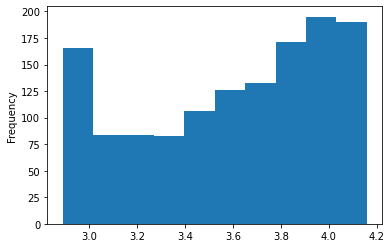

In [21]:
import matplotlib.pyplot as plt
df["age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

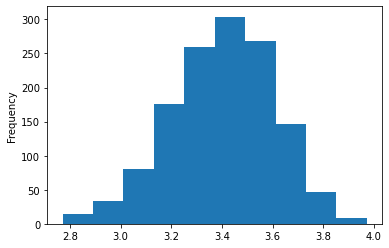

In [22]:
df['bmi'].plot.hist()

In [23]:
df['bmi']=np.log(df['bmi'])

<AxesSubplot:ylabel='Frequency'>

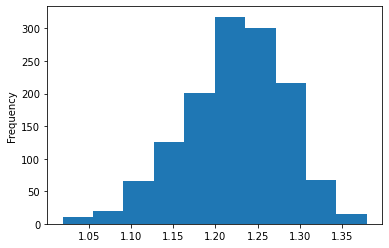

In [24]:
df['bmi'].plot.hist()

<AxesSubplot:>

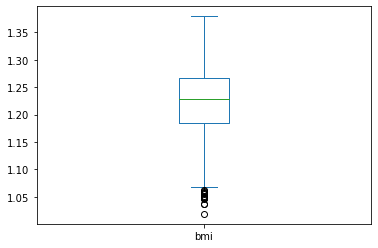

In [37]:
df["bmi"].plot.box()

<AxesSubplot:>

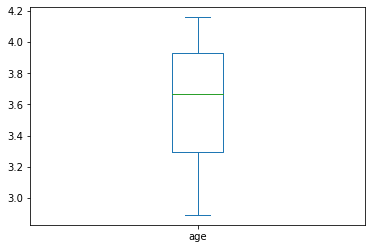

In [26]:
df["age"].plot.box()

<AxesSubplot:>

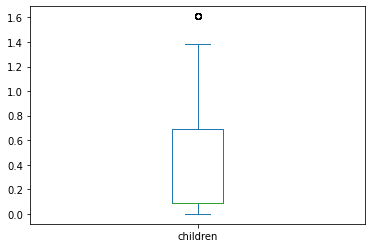

In [27]:
df["children"].plot.box()

# Bivarayet Analysis

age            AxesSubplot(0.125,0.125;0.110714x0.755)
bmi         AxesSubplot(0.257857,0.125;0.110714x0.755)
children    AxesSubplot(0.390714,0.125;0.110714x0.755)
charges     AxesSubplot(0.523571,0.125;0.110714x0.755)
dtype: object

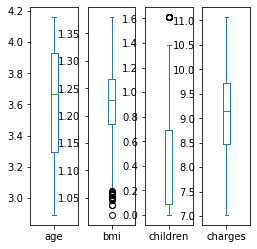

In [28]:
df.plot(kind='box',subplots=True,layout=(1,6))

<AxesSubplot:xlabel='bmi'>

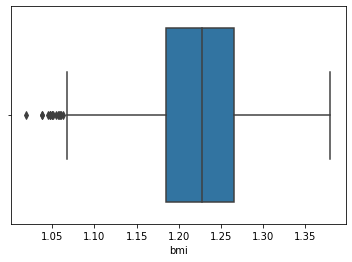

In [29]:
import pandas as pd
import seaborn as sns
sns.boxplot(df["bmi"])

<AxesSubplot:xlabel='children'>

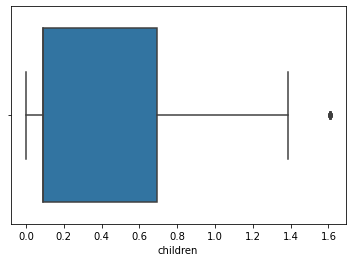

In [30]:
sns.boxplot(df["children"])

<AxesSubplot:xlabel='age'>

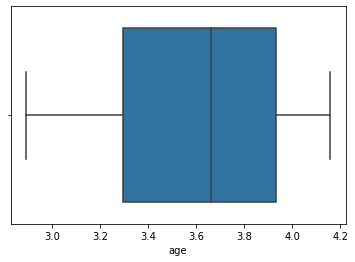

In [31]:
sns.boxplot(df["age"])

We can observe that in 'bmi'column there is too much outliers present.so i need to remove it.

In [32]:
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(df['bmi']))
print(z)

0       0.336994
1       0.589663
2       0.480434
3       1.398525
4       0.165583
          ...   
1333    0.176012
1334    0.321580
1335    0.996621
1336    0.732204
1337    0.133223
Name: bmi, Length: 1338, dtype: float64


In [33]:
thresold=2
#position of the outliers
print(np.where(z>2))

(array([  28,   98,   99,  116,  128,  169,  172,  182,  198,  232,  250,
        266,  286,  380,  395,  401,  410,  411,  412,  428,  431,  438,
        454,  543,  547,  549,  560,  586,  591,  613,  660,  680,  681,
        684,  769,  821,  847,  860,  863,  896,  927,  930,  950,  972,
        990,  994, 1004, 1011, 1027, 1029, 1047, 1074, 1082, 1085, 1088,
       1100, 1119, 1129, 1133, 1205, 1226, 1251, 1286, 1290, 1317],
      dtype=int64),)


<AxesSubplot:xlabel='bmi'>

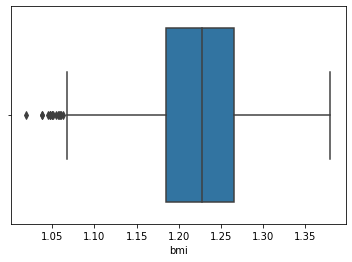

In [34]:
import seaborn as sns
sns.boxplot(df["bmi"])

In [35]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.111339,0.067822,0.535062
bmi,0.111339,1.000000,0.012975,0.138961
children,0.067822,0.012975,1.000000,0.145854
charges,0.535062,0.138961,0.145854,1.000000


<Figure size 1080x1440 with 0 Axes>

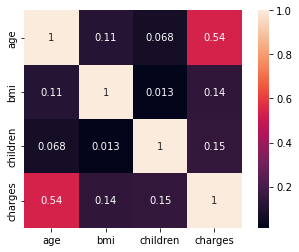

<Figure size 1080x1440 with 0 Axes>

In [44]:
sns.heatmap(df.corr(),annot=True,cbar=True,square=True)
plt.figure(figsize=(15,20))

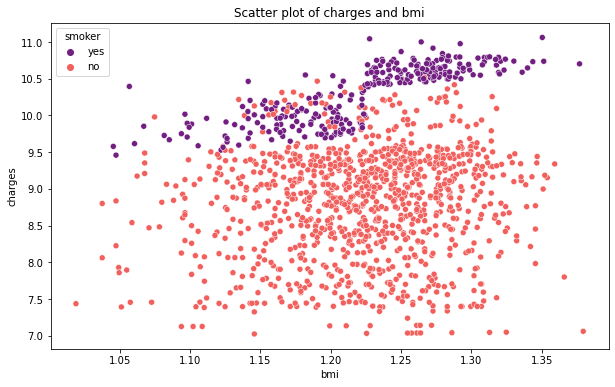

In [45]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')
plt.show()

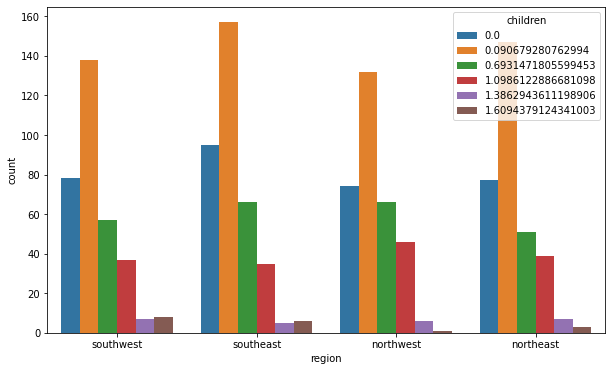

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, hue='children', x='region')
plt.show()

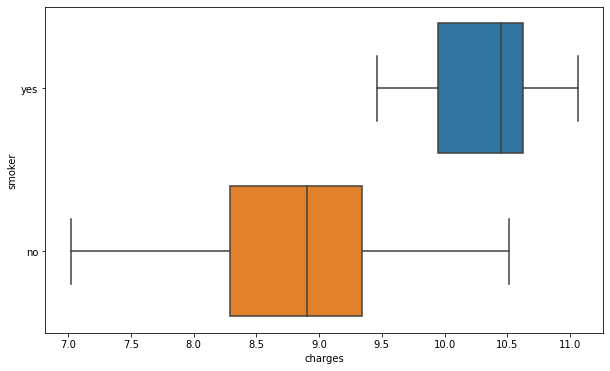

In [47]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='charges', y='smoker')
plt.show()

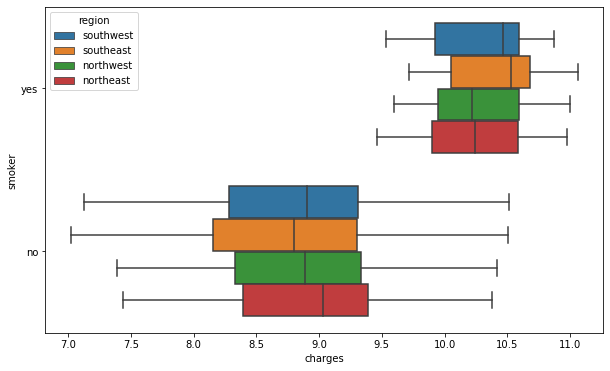

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='charges', y='smoker', hue='region')
plt.show()

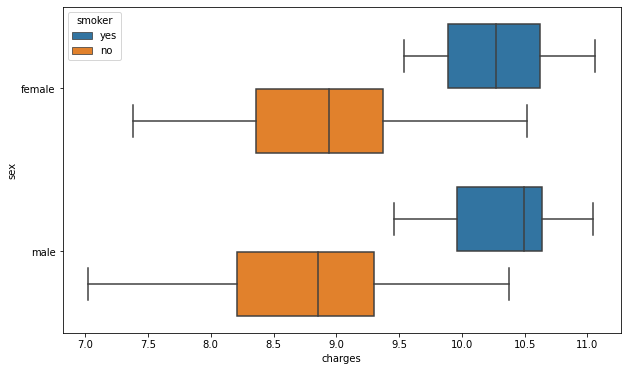

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='charges', y='sex', hue='smoker')
plt.show()

# Label encoding

In [50]:
from sklearn.preprocessing import LabelEncoder
data = df

le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()
le1.fit(data.sex.drop_duplicates()) 
data.sex = le1.transform(data.sex)

le2.fit(data.smoker.drop_duplicates()) 
data.smoker = le2.transform(data.smoker)

le3.fit(data.region.drop_duplicates()) 
data.region = le3.transform(data.region)

# Distrubution of charges on the basis of smoking status

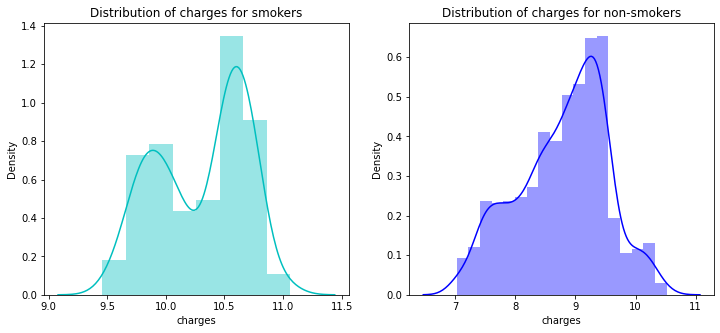

In [51]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')
plt.show()

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

We also add another column theta0 which is the bias of the model.

In [54]:
df_main = df 
df_main ['theta0'] = 1
df_main .head(3)

,age,sex,bmi,children,smoker,region,charges,theta0
0,2.944439,0,1.202560,0.090679,1,3,9.734176,1
1,2.890372,1,1.258340,0.000000,0,2,7.453302,1
2,3.332205,1,1.251765,1.098612,0,2,8.400538,1


In [55]:
df_main.describe()

,age,sex,bmi,children,smoker,region,charges,theta0
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.0
mean,3.597222,0.505232,1.222845,0.339697,0.204783,1.515695,9.098659,1.0
std,0.390621,0.500160,0.060217,0.432239,0.403694,1.104885,0.919527,0.0
min,2.890372,0.000000,1.018878,0.000000,0.000000,0.000000,7.022756,1.0
25%,3.295837,0.000000,1.184615,0.090679,0.000000,1.000000,8.463853,1.0
50%,3.663562,1.000000,1.228014,0.090679,0.000000,2.000000,9.146552,1.0
75%,3.931826,1.000000,1.265978,0.693147,0.000000,2.000000,9.719558,1.0
max,4.158883,1.000000,1.379456,1.609438,1.000000,3.000000,11.063045,1.0


In [56]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
 7   theta0    1338 non-null   int64  
dtypes: float64(4), int32(3), int64(1)
memory usage: 68.1 KB


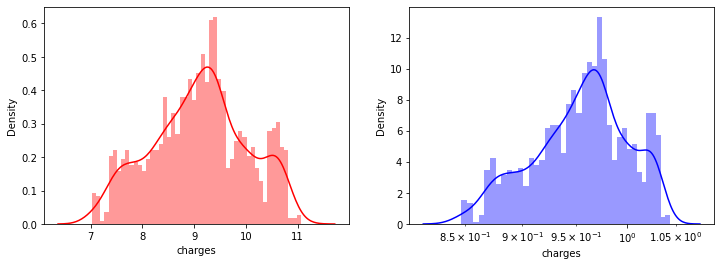

In [57]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_xscale('log')

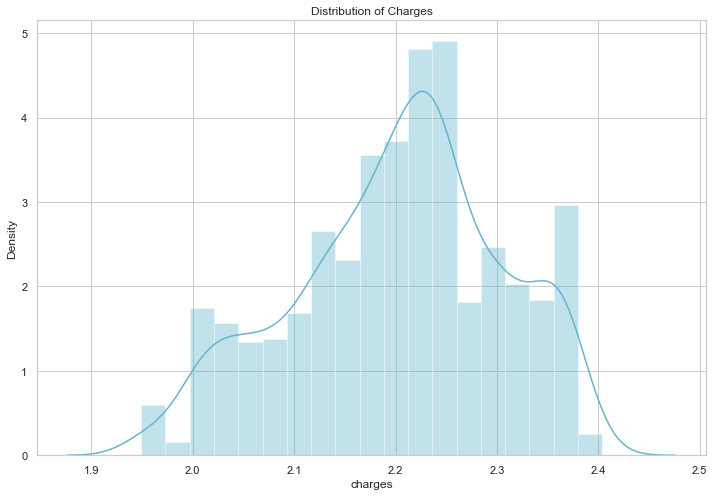

<Figure size 432x288 with 0 Axes>

In [58]:


sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(np.log(df['charges']), kde = True, color = 'c')
plt.title('Distribution of Charges')
plt.show()
# save the plot into a file
plt.savefig('Distribution_of_Charges.png')

In [59]:
df['charges'] = np.log10(df['charges'])

# Splitting the data into X and y

In [61]:
X = np.array(df[['age','sex','bmi','children','smoker','region','theta0']])
y = np.array(df[['charges']])
print(X.shape , y.shape)

(1338, 7) (1338, 1)


This is done to ensure that the model is not overfitting the training data and to gather better metrics of the model.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Standardizing the data Before fitting the model we standardize the data.


We do this for each column of the data. This is done to ensure zero mean and standard deviation of 1.

In [63]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
X_train_scaled.shape, X_test_scaled.shape

((1070, 7), (268, 7))

In [65]:
#Hypothesis function
def hyp(theta,X):
    return np.dot(X,theta)

In [66]:
#Cost Function
def cost_function(theta,X,y):
    hx = hyp(theta,X) - y
    return float((np.dot(hx.T,hx))/(2*(X.shape[0])))

In [67]:
initial_theta = np.zeros([X_train_scaled.shape[1],1])

cost_function(initial_theta,X_train_scaled,y_train)

0.45847944030100807

In [68]:
print(hyp(initial_theta,X_train_scaled).shape )
theta = initial_theta 

(1070, 1)


# Gradient Descent

In [69]:
m = X.shape[0] 
alpha = 0.1
theta = initial_theta  
cost_func_graph = []
epochs = 20
for i in range(epochs):
    theta = theta - (alpha/m)*(np.dot(X_train_scaled.T , hyp(theta,X_train_scaled) - y_train))
    cost_func_graph.append(cost_function(theta,X_train_scaled,y_train))

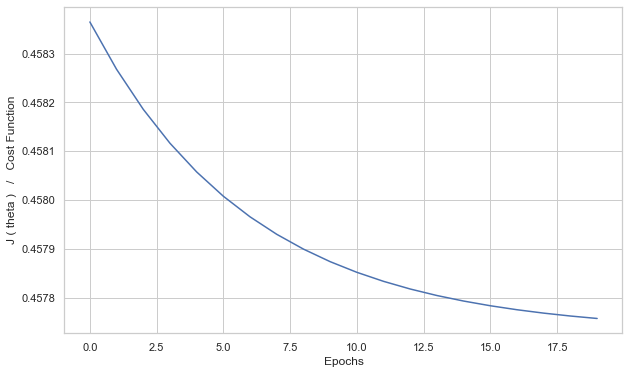

In [70]:
plt.figure(figsize=(10,6))
plt.plot([i for i in range(epochs)][:],cost_func_graph[:]) 
plt.xlabel("Epochs")
plt.ylabel("J ( theta )   /   Cost Function")
plt.grid(True)

In [71]:
# importing linear regression model
from sklearn.linear_model import LinearRegression
# instantiate linear regression model
lin_reg = LinearRegression()
# fit linear regression model
lin_reg.fit(X_train_scaled, y_train)
# predicting the response
y_pred = lin_reg.predict(X_test_scaled)

# Calculating metrics of the model


In [72]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.013317602983125022
Mean Squared Error: 0.00043824582862292356
Root Mean Squared Error: 0.02093432178559706


# Ridge Regression


In [73]:
from sklearn.linear_model import Ridge
# instantiate ridge regression model
ridge_reg = Ridge(alpha=0.3)
# fit ridge regression model
ridge_reg.fit(X_train_scaled, y_train)
# predicting the response
y_pred = ridge_reg.predict(X_test_scaled)

In [74]:
## Metrics 
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.013318199221580425
Mean Squared Error: 0.00043822531421633154
Root Mean Squared Error: 0.020933831809210934


# Lasso Regression


In [75]:
# import lasso
from sklearn.linear_model import Lasso
# create lasso object
lasso_reg = Lasso(alpha=0.1)
# fit the model
lasso_reg.fit(X_train_scaled, y_train)
# predict the response
y_pred = lasso_reg.predict(X_test_scaled)
## Metrics 
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03542791499545998
Mean Squared Error: 0.0019479722511975646
Root Mean Squared Error: 0.04413583862574228


Polynomial Regression Converting to Polynomial Features



In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
scaler = StandardScaler()
degree = 2 
polyreg = make_pipeline(PolynomialFeatures(degree),scaler,LinearRegression())
polyreg.fit(X_train,y_train)
y_pred = polyreg.predict(X_test)
## Metrics 
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.009675494208366636
Mean Squared Error: 0.0002639690985284688
Root Mean Squared Error: 0.01624712585439249


# Comparing the model with random forest regression


In [77]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, criterion = 'mse',
                            random_state = 1,n_jobs = -1)
rf.fit(X_train, y_train)

RandomForestRegressor(criterion='mse', n_jobs=-1, random_state=1)

In [78]:
for i in range(len(rf.feature_importances_)):
    print("Feature: " + str(i) + "  " + "Importance: " + str(rf.feature_importances_[i]))

Feature: 0  Importance: 0.4266616111009918
Feature: 1  Importance: 0.01071018181096437
Feature: 2  Importance: 0.09986476201611527
Feature: 3  Importance: 0.04150287962870603
Feature: 4  Importance: 0.39759780837307185
Feature: 5  Importance: 0.02366275707015062
Feature: 6  Importance: 0.0


Metrics of the model


In [79]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state = 42)
dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [80]:
for i in range(len(dt.feature_importances_)):
    print("Feature: " + str(i) + "  " + "Importance: " + str(dt.feature_importances_[i]))

Feature: 0  Importance: 0.4214871423717187
Feature: 1  Importance: 0.011501178955294225
Feature: 2  Importance: 0.1146159871968955
Feature: 3  Importance: 0.036272377425142645
Feature: 4  Importance: 0.39972221371148736
Feature: 5  Importance: 0.01640110033946162
Feature: 6  Importance: 0.0


In [81]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)    

print(f'Mean Absolute Error : {mean_absolute_error(y_test, y_test_pred)}')
print(f'Mean Squared Error : {mean_squared_error(y_test, y_test_pred)}')
print(f'Root Mean Squared Error : { np.sqrt(mean_squared_error(y_test, y_test_pred))}')

Mean Absolute Error : 0.011199886860731237
Mean Squared Error : 0.0005246172903976208
Root Mean Squared Error : 0.02290452554404087


# Results
From the above results we can see that the polynomial regression model is performing best.